# California Housing Regression with Neural Networks

### 🔹 1. Imports and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

### 🔹 2. Load and Preprocess Data

In [2]:
# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### 🔹 3. Build Regression Models
#### ✅ Base Model with `ReLU` Activation

In [3]:
def build_model(activation='relu', optimizer='adam'):
    model = Sequential([
        Dense(64, activation=activation, input_shape=(X_train.shape[1],)),
        Dense(64, activation=activation),
        Dense(1)  # Linear activation (default) for regression
    ])
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

### 🔹 4. Train and Evaluate Models
#### 🔁 Try different activations: `relu` vs `tanh`

In [4]:
activations = ['relu', 'tanh']
optimizers = ['adam', 'sgd']
results = {}

for activation in activations:
    for opt in optimizers:
        print(f'\nTraining with activation={activation}, optimizer={opt}')
        model = build_model(activation=activation, optimizer=opt)
        
        history = model.fit(
            X_train_scaled, y_train,
            validation_data=(X_val_scaled, y_val),
            epochs=30,
            batch_size=32,
            verbose=0
        )
        
        # Evaluate on both train and validation sets
        train_pred = model.predict(X_train_scaled)
        val_pred = model.predict(X_val_scaled)

        train_mse = mean_squared_error(y_train, train_pred)
        val_mse = mean_squared_error(y_val, val_pred)
        train_mae = mean_absolute_error(y_train, train_pred)
        val_mae = mean_absolute_error(y_val, val_pred)
        
        results[f'{activation}_{opt}'] = {
            'Train MSE': train_mse,
            'Val MSE': val_mse,
            'Train MAE': train_mae,
            'Val MAE': val_mae,
            'History': history.history
        }


Training with activation=relu, optimizer=adam


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training with activation=relu, optimizer=sgd


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training with activation=tanh, optimizer=adam


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training with activation=tanh, optimizer=sgd


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### 🔹 5. Compare Results

In [5]:
# Create a comparison table
pd.DataFrame(results).T[['Train MSE', 'Val MSE', 'Train MAE', 'Val MAE']]

,Train MSE,Val MSE,Train MAE,Val MAE
relu_adam,0.261763,0.288503,0.343015,0.355076
relu_sgd,0.29406,0.307557,0.384164,0.393277
tanh_adam,0.27878,0.292626,0.366634,0.375482
tanh_sgd,0.320385,0.34017,0.397822,0.408859


### 📊 6. Plot Training Curves

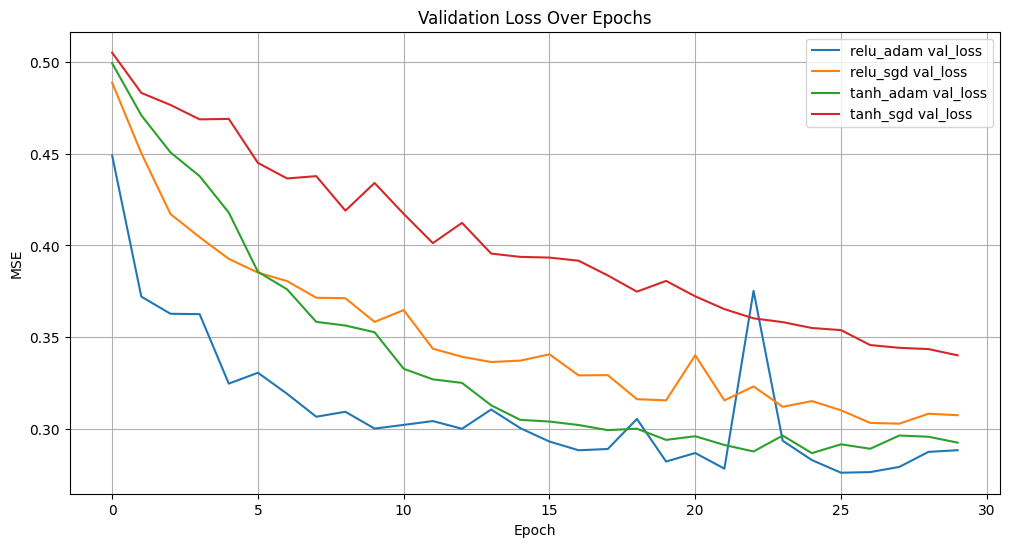

In [6]:
plt.figure(figsize=(12, 6))
for key, res in results.items():
    plt.plot(res['History']['val_loss'], label=f'{key} val_loss')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,803 (18.77 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [12]:
# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression (linear activation)
])

In [13]:
# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

In [14]:
# Now fit the model
model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 212.5305 - mae: 3.8950 - val_loss: 1.1199 - val_mae: 0.8104
Epoch 2/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9867 - mae: 0.9897 - val_loss: 0.9189 - val_mae: 0.7638
Epoch 3/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 36.9683 - mae: 2.0335 - val_loss: 1.1287 - val_mae: 0.8744
Epoch 4/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.9119 - mae: 1.5277 - val_loss: 0.8655 - val_mae: 0.7179
Epoch 5/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0138 - mae: 1.3342 - val_loss: 1.9454 - val_mae: 1.0002
